<a href="https://colab.research.google.com/github/RIO-bn/data-analaytics-projects/blob/main/dataanalytics_Data_cleaning%2C_hyperparameter_and_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset.csv")
print(df.head())

        price        cost  sales  profit_margin  inventory  \
0  218.543054  181.610932     40      16.899243        105   
1  477.821438  385.033827      7      19.418888        192   
2  379.397274  276.736765     32      27.058842         59   
3  319.396318  281.841334     48      11.758114         45   
4  120.208388   69.743681     19      41.981019         35   

   discount_percentage  delivery_days category material  color  location  \
0            27.796433              9      Bed  Plastic    Red     Rural   
1            26.943715              6    Chair    Glass   Blue     Rural   
2            21.948130              2    Table    Metal  Black  Suburban   
3            11.009944              2    Table    Glass  Green     Rural   
4             3.183763              9    Chair    Glass  Brown     Rural   

   season store_type   brand       revenue jenis kelamin penjual   \
0  Spring     Online  BrandA   3949.165238              Perempuan   
1  Summer     Online  BrandD  -3

In [ ]:
print(df.columns)


Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue',
       'jenis kelamin penjual ', 'jenis kelamin pembeli'],
      dtype='object')


In [ ]:

df.drop(columns='jenis kelamin penjual ', inplace=True, errors='ignore')
# membersihkan dataset dari kolom yang tidak diperlukan
df.drop(columns='jenis kelamin pembeli' , inplace=True,errors = 'ignore')

In [ ]:
print(df.head())

        price        cost  sales  profit_margin  inventory  \
0  218.543054  181.610932     40      16.899243        105   
1  477.821438  385.033827      7      19.418888        192   
2  379.397274  276.736765     32      27.058842         59   
3  319.396318  281.841334     48      11.758114         45   
4  120.208388   69.743681     19      41.981019         35   

   discount_percentage  delivery_days category material  color  location  \
0            27.796433              9      Bed  Plastic    Red     Rural   
1            26.943715              6    Chair    Glass   Blue     Rural   
2            21.948130              2    Table    Metal  Black  Suburban   
3            11.009944              2    Table    Glass  Green     Rural   
4             3.183763              9    Chair    Glass  Brown     Rural   

   season store_type   brand       revenue  
0  Spring     Online  BrandA   3949.165238  
1  Summer     Online  BrandD  -3521.002258  
2    Fall     Online  BrandD  14285

In [ ]:
df_bersih = df.dropna()

In [ ]:
print(df_bersih.head())


        price        cost  sales  profit_margin  inventory  \
0  218.543054  181.610932     40      16.899243        105   
1  477.821438  385.033827      7      19.418888        192   
2  379.397274  276.736765     32      27.058842         59   
3  319.396318  281.841334     48      11.758114         45   
4  120.208388   69.743681     19      41.981019         35   

   discount_percentage  delivery_days category material  color  location  \
0            27.796433              9      Bed  Plastic    Red     Rural   
1            26.943715              6    Chair    Glass   Blue     Rural   
2            21.948130              2    Table    Metal  Black  Suburban   
3            11.009944              2    Table    Glass  Green     Rural   
4             3.183763              9    Chair    Glass  Brown     Rural   

   season store_type   brand       revenue  
0  Spring     Online  BrandA   3949.165238  
1  Summer     Online  BrandD  -3521.002258  
2    Fall     Online  BrandD  14285

In [ ]:
df_bersih.info()
#untuk mengecek apakah datanya sudah bersih atau belum
#sekarang datanya sudah bersih

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [ ]:
#kode untuk eksport dataset yang sudah bersih jika mau
nama_file_baru = "DatasetClean.csv"
df_bersih.to_csv(nama_file_baru,index=False)
files.download(nama_file_baru)

print(f"File '{nama_file_baru}' berhasil didownload ke komputer lokal Anda.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File 'DatasetClean.csv' berhasil didownload ke komputer lokal Anda.


In [ ]:
cat_features = ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand']
#menentukan fitur fitur yang termasuk ke dalam category aar dipisah dan di encoding dulu

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import xgboost as xgboost
#menggunakan one hot encding untuk data yang bersifat category

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cat = one_hot_encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_cat, columns=one_hot_encoder.get_feature_names_out(cat_features))


num_features = ['price', 'cost','sales','profit_margin', 'inventory', 'discount_percentage',
                'delivery_days', 'revenue']
df_encoded = pd.concat([df[num_features], encoded_df], axis=1)

# Simpan hasil encoding jika diperlukan
df_encoded.to_csv("encoded_dataset.csv", index=False)

In [ ]:
df_encoded.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,218.543054,181.610932,40,16.899243,105,27.796433,9,3949.165238,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,477.821438,385.033827,7,19.418888,192,26.943715,6,-3521.002258,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,379.397274,276.736765,32,27.058842,59,21.948130,2,14285.560220,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,319.396318,281.841334,48,11.758114,45,11.009944,2,12261.073700,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,120.208388,69.743681,19,41.981019,35,3.183763,9,-4588.255733,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#saat melatih model
!pip install catboost
import xgboost as xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#kita memprediksi sales makanya sales kita drop di x
from sklearn.model_selection import train_test_split, GridSearchCV
X = df_encoded.drop('sales',axis=1)
y = df_encoded['sales']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Ukuran Training Set: {len(X_train)}")
print(f"Ukuran Validasi Set: {len(X_val)}")
print(f"Ukuran Test Set: {len(X_test)}")



Ukuran Training Set: 1750
Ukuran Validasi Set: 375
Ukuran Test Set: 375


In [ ]:
# Tentukan jenis tugas dan metrik evaluasi untuk regresi
task_type = 'regression'
scoring_metric = 'neg_root_mean_squared_error'  # Untuk GridSearchCV

# Define parameter grids (sesuaikan dengan rentang yang masuk akal untuk setiap model)
param_grid_xgb = { #mencari parameter terbaik di dalam xgboost
    'n_estimators': [100, 300, 500], #n estimatior
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'random_state': [42]
}

param_grid_catboost = { #mencari parameter terbauk untuk catboost
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'random_seed': [42],
    'verbose': [0]  # Jangan menampilkan output training selama grid search
}

param_grid_rf = { #mencari parameter terbaik untuk random forest
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

# Inisialisasi model regresi
xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)
rf_model = RandomForestRegressor(random_state=42)

# Lakukan Grid Search untuk setiap model
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring=scoring_metric, cv=3, n_jobs=-1)
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, scoring=scoring_metric, cv=3, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring=scoring_metric, cv=3, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)
grid_search_catboost.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Dapatkan parameter terbaik dan model terbaik
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

best_params_catboost = grid_search_catboost.best_params_
best_model_catboost = grid_search_catboost.best_estimator_

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Parameter Terbaik XGBoost:", best_params_xgb)
print("Parameter Terbaik CatBoost:", best_params_catboost)
print("Parameter Terbaik Random Forest:", best_params_rf)

# Latih model terbaik pada set training
best_model_xgb.fit(X_train, y_train)
best_model_catboost.fit(X_train, y_train, verbose=0)
best_model_rf.fit(X_train, y_train)

# Prediksi pada set validasi
y_pred_xgb_val = best_model_xgb.predict(X_val)
y_pred_catboost_val = best_model_catboost.predict(X_val)
y_pred_rf_val = best_model_rf.predict(X_val)



Parameter Terbaik XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'random_state': 42, 'subsample': 0.7}
Parameter Terbaik CatBoost: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'random_seed': 42, 'verbose': 0}
Parameter Terbaik Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 42}


In [ ]:
import numpy as np
def evaluate_regression_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Hitung RMSE dari MSE
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    return {'rmse': rmse, 'mae': mae, 'r_squared': r_squared}

results_xgb_val = evaluate_regression_model(y_val, y_pred_xgb_val)
results_catboost_val = evaluate_regression_model(y_val, y_pred_catboost_val)
results_rf_val = evaluate_regression_model(y_val, y_pred_rf_val)

print("\nPerforma pada Validasi Set:")
print("XGBoost:", results_xgb_val)
print("CatBoost:", results_catboost_val)
print("Random Forest:", results_rf_val)

# Evaluasi akhir pada set test
y_pred_xgb_test = best_model_xgb.predict(X_test)
y_pred_catboost_test = best_model_catboost.predict(X_test)
y_pred_rf_test = best_model_rf.predict(X_test)

results_xgb_test = evaluate_regression_model(y_test, y_pred_xgb_test)
results_catboost_test = evaluate_regression_model(y_test, y_pred_catboost_test)
results_rf_test = evaluate_regression_model(y_test, y_pred_rf_test)

print("\nPerforma pada Test Set:")
print("XGBoost:", results_xgb_test)
print("CatBoost:", results_catboost_test)
print("Random Forest:", results_rf_test)


Performa pada Validasi Set:
XGBoost: {'rmse': np.float64(11.635730672006996), 'mae': 9.418975830078125, 'r_squared': 0.2792481780052185}
CatBoost: {'rmse': np.float64(11.647718052825788), 'mae': 9.424033902665075, 'r_squared': 0.27776221820154445}
Random Forest: {'rmse': np.float64(11.685090329758747), 'mae': 9.393545782573716, 'r_squared': 0.2731201119414167}

Performa pada Test Set:
XGBoost: {'rmse': np.float64(11.75521669850906), 'mae': 9.677897453308105, 'r_squared': 0.317186176776886}
CatBoost: {'rmse': np.float64(11.764540023166422), 'mae': 9.697847411708224, 'r_squared': 0.3161026662254689}
Random Forest: {'rmse': np.float64(11.805057548294526), 'mae': 9.649134397296947, 'r_squared': 0.3113838171751012}


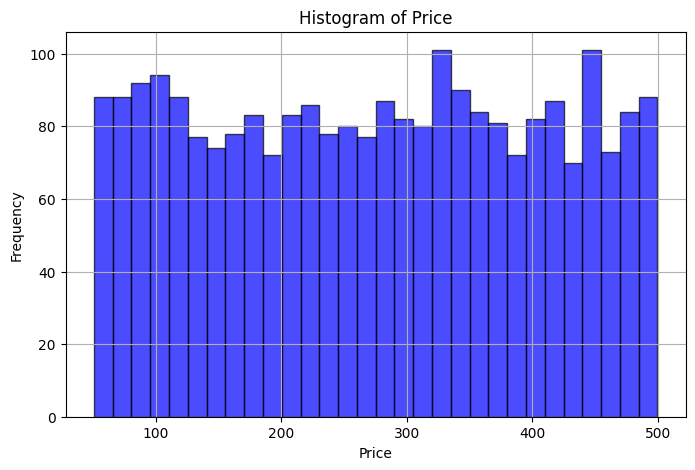

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_bersih['price'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(True)
plt.show()


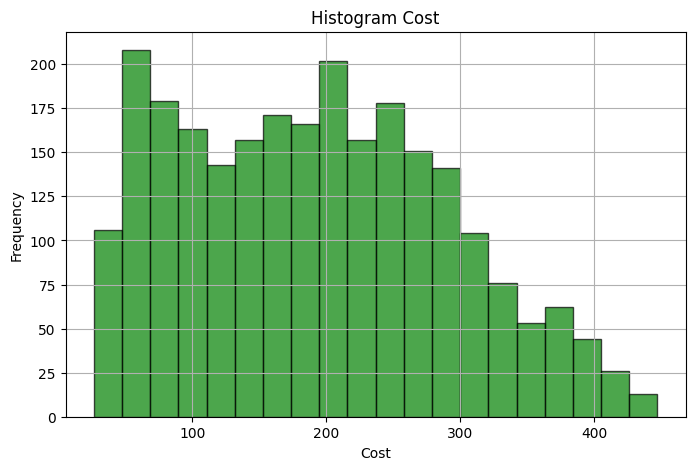

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_bersih['cost'],bins=20,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram Cost')
plt.grid(True)
plt.show()

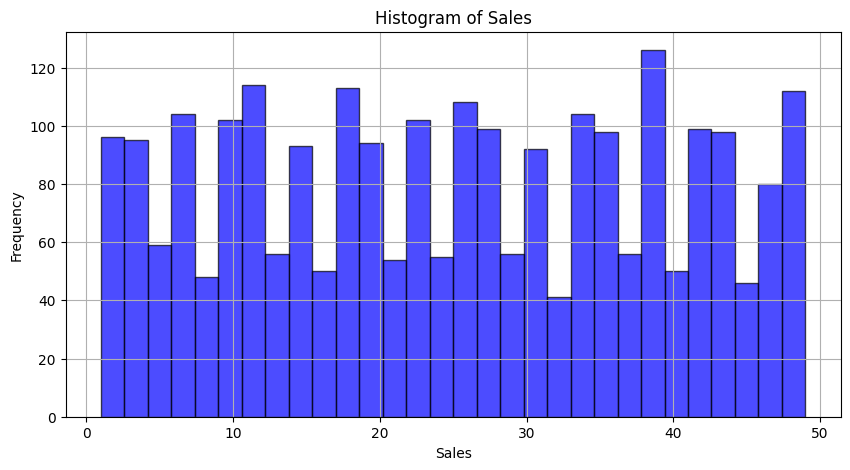

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_bersih['sales'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.grid(True)
plt.show()

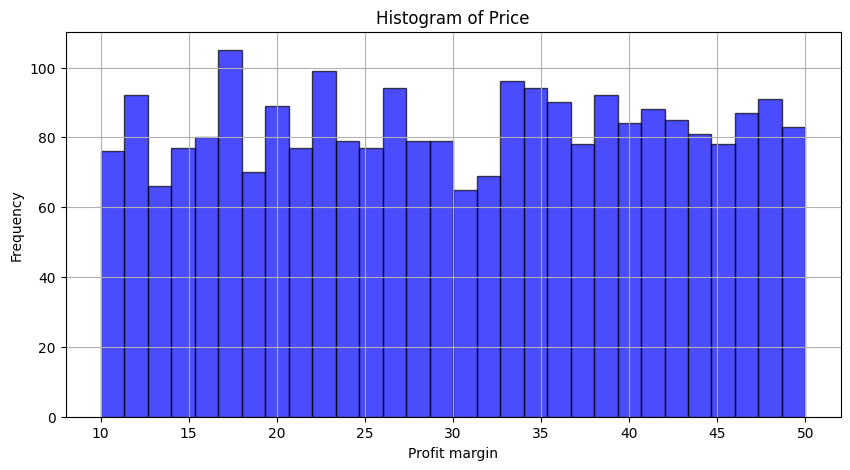

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_bersih['profit_margin'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Profit margin')
plt.ylabel('Frequency')
plt.title('Histogram of Profit margin')
plt.grid(True)
plt.show()

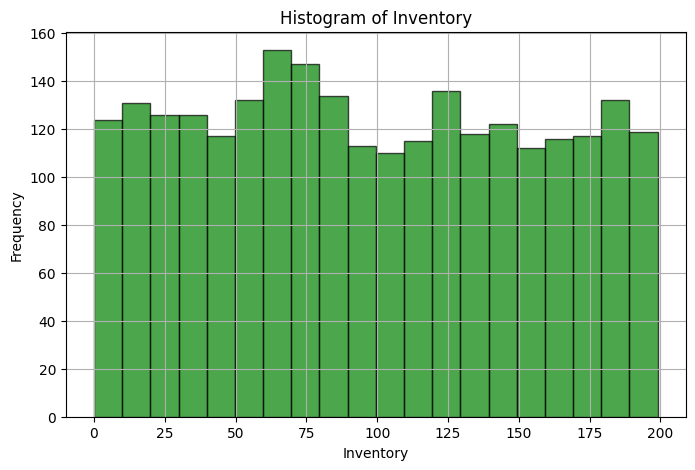

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_bersih['inventory'],bins=20,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('Inventory')
plt.ylabel('Frequency')
plt.title('Histogram of Inventory')
plt.grid(True)
plt.show()

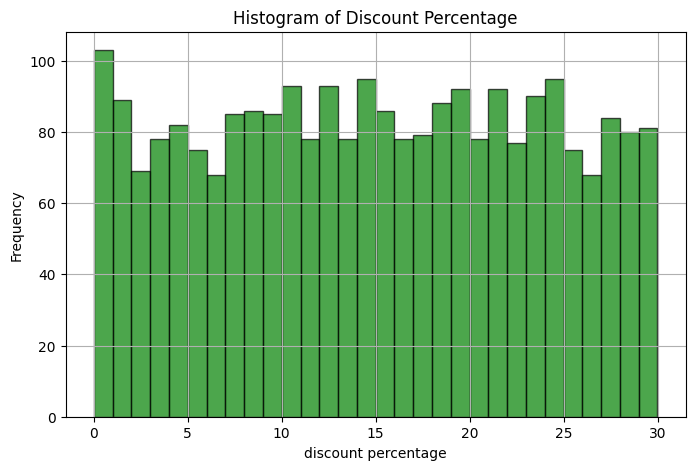

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_bersih['discount_percentage'],bins=30,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('discount percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Percentage')
plt.grid(True)
plt.show()

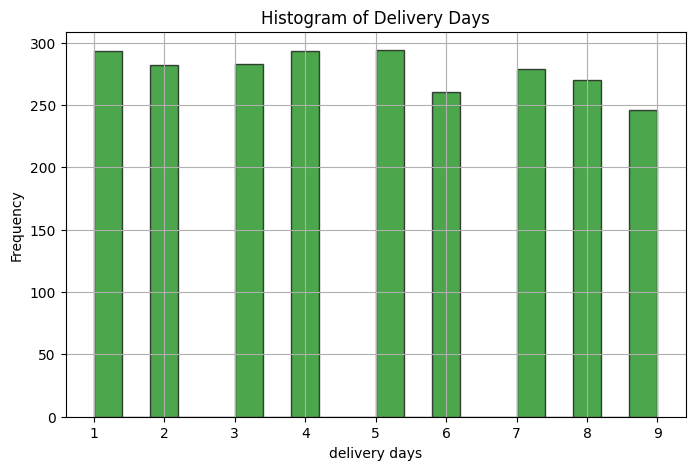

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_bersih['delivery_days'],bins=20,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('delivery days')
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Days')
plt.grid(True)
plt.show()

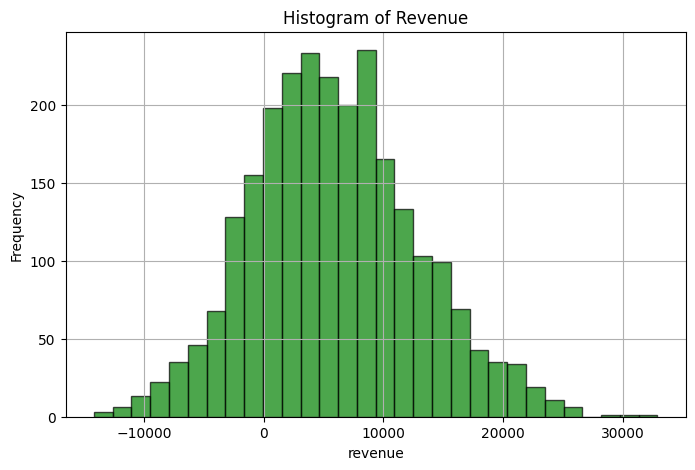

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_bersih['revenue'],bins=30,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.grid(True)
plt.show()

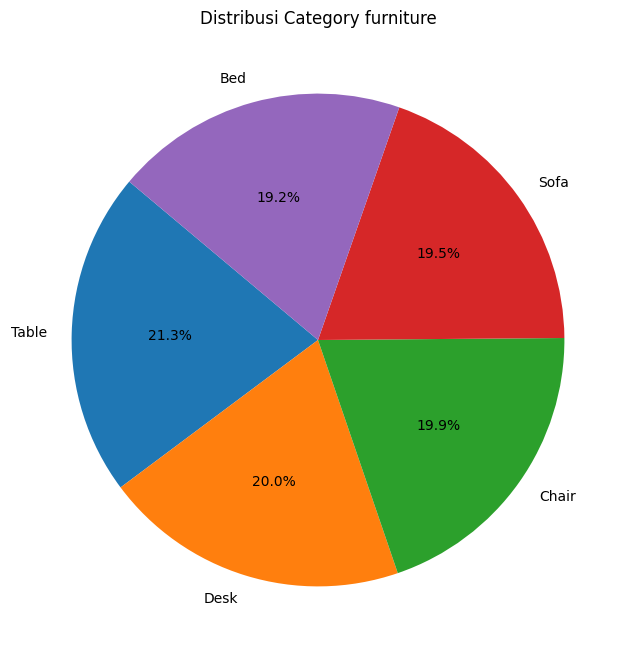

In [ ]:
# Hitung jumlah kemunculan tiap warna
color_counts = df_bersih["category"].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Category furniture")
plt.show()

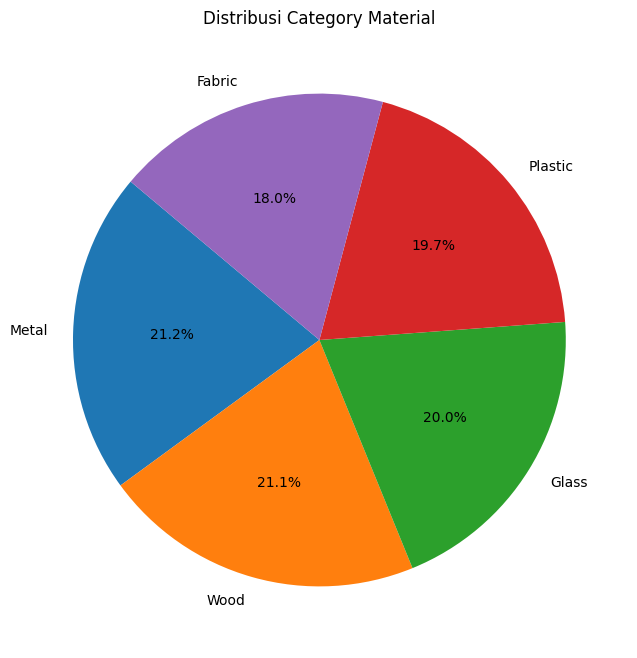

In [ ]:
color_counts = df_bersih["material"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Category Material")
plt.show()

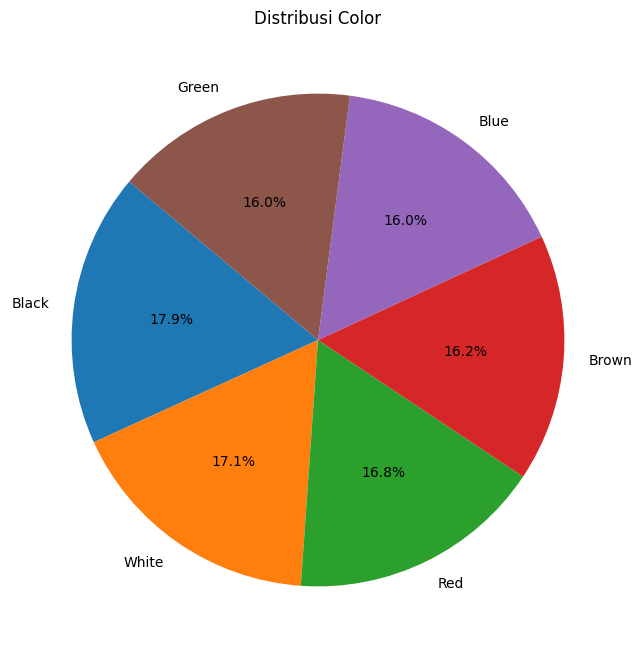

In [ ]:
color_counts = df_bersih["color"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Color")
plt.show()

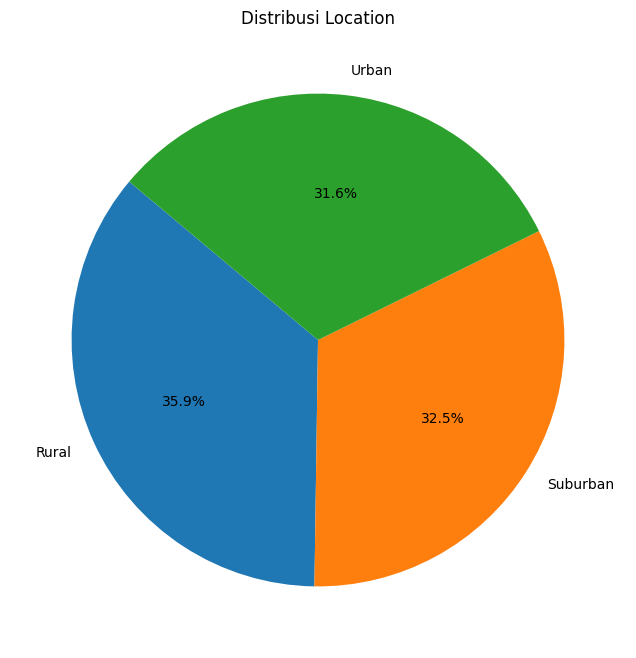

In [ ]:
color_counts = df_bersih["location"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Location")
plt.show()

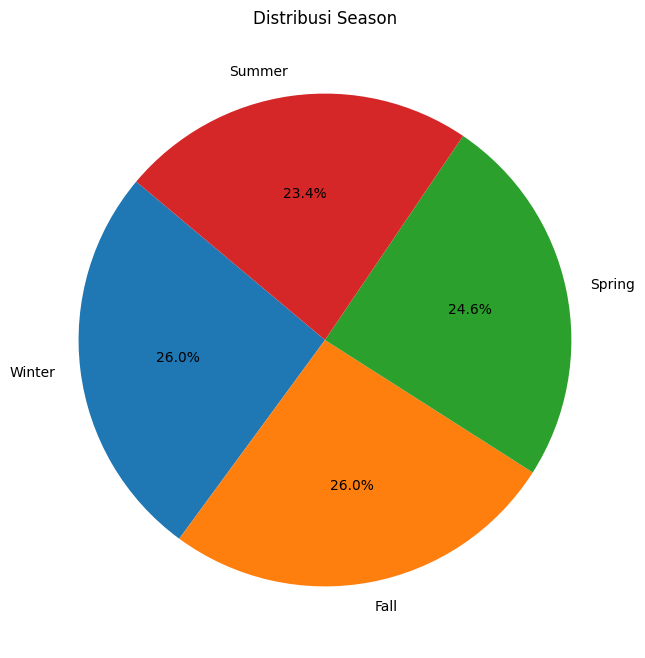

In [ ]:
color_counts = df_bersih["season"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Season")
plt.show()

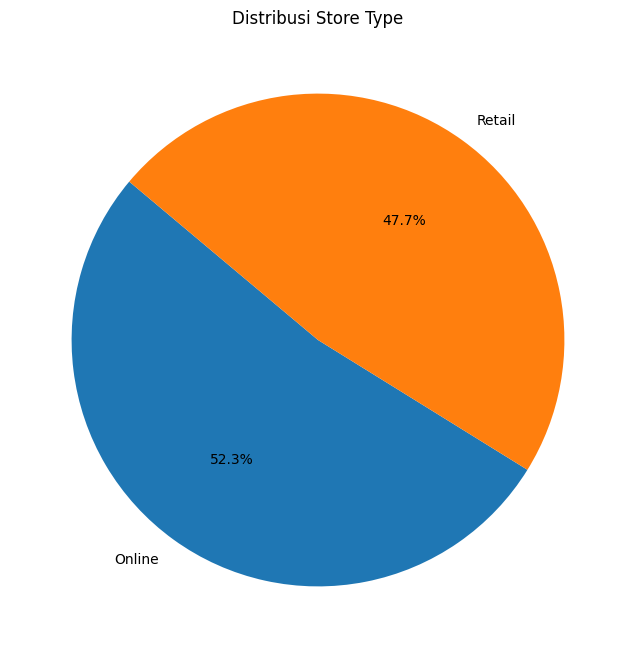

In [ ]:
color_counts = df_bersih["store_type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Store Type")
plt.show()

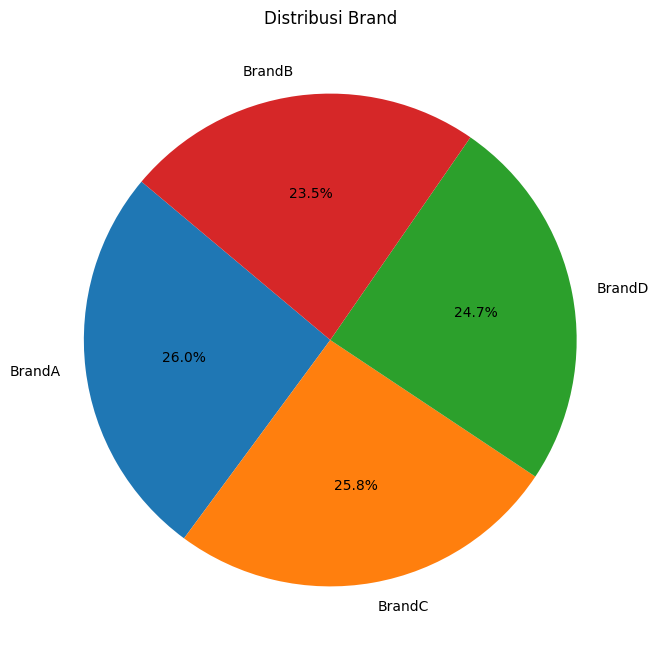

In [ ]:
color_counts = df_bersih["brand"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Distribusi Brand")
plt.show()